<H1>SuperAlligator JCO</H1>
6 EMA - 3 SuperTrend - Stock RSI - WillR
<H2>Init and load pairs</H2>

In [1]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import pandas_ta as pda # used for superTrend
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

<H2>Load candles</H2>

In [2]:
#pairList = pairJson['ftxBnbPair']
pairList = pairJson['ftxClassicPair']
# pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 22266 candles for BTCUSD
Successfully load 20940 candles for ETHUSD
Successfully load 19146 candles for BNBUSD
Successfully load 16689 candles for LTCUSD
Successfully load 9269 candles for DOGEUSD
Successfully load 13532 candles for XRPUSD
Successfully load 13353 candles for SOLUSD
Successfully load 6452 candles for SHIBUSD
Successfully load 15679 candles for LINKUSD
Successfully load 12102 candles for UNIUSD
Successfully load 10819 candles for MATICUSD
Successfully load 7271 candles for AXSUSD
Successfully load 7583 candles for CROUSD
Successfully load 22075 candles for FTTUSD
Successfully load 15526 candles for TRXUSD
Successfully load 16689 candles for BCHUSD
Successfully load 8285 candles for FTMUSD
Successfully load 9869 candles for GRTUSD
Successfully load 11503 candles for AAVEUSD
Successfully load 10819 candles for OMGUSD
Successfully load 7896 candles for LRCUSD
Successfully load 12492 candles for SUSHIUSD
Successfully load 3431 candles for MANAUSD
Successful

,open,high,low,close,volume
timestamp,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01
...,...,...,...,...,...
2022-02-03 04:00:00,36843.0,36977.0,36807.0,36922.0,4.261688e+06
2022-02-03 05:00:00,36928.0,37099.0,36861.0,37021.0,7.859765e+06
2022-02-03 06:00:00,37021.0,37031.0,36854.0,36950.0,1.389109e+07


<H2>Calculate Indicators</H2>

In [3]:
# -- Indicator variable --
stochWindow = 14
willWindow = 14

for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume','FG']), axis=1, inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=3) # original 7, Fibo 5
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=13) # original 30, Fibo 13
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=34) # original 50, Fibo 34
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=89) # original 100, Fibo 89
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=233) # original 121, Fibo 233
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=610) # original 200, Fibo 610

    df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
    df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
    df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
    df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])

    #Super Trend
    ST_length = 10
    ST_multiplier = 3.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    #Super Trend 1
    ST_length = 10
    ST_multiplier = 1.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_1'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 2
    ST_length = 11
    ST_multiplier = 2.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_2'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 3
    ST_length = 12
    ST_multiplier = 3.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_3'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    # df['ADX']=ta.trend.adx(high=df['high'], low=df['low'], close=df['close'], window=14)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)
    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,...,SUPER_TREND,SUPER_TREND_DIRECTION,SUPER_TREND_1,SUPER_TREND_DIRECTION_1,SUPER_TREND_2,SUPER_TREND_DIRECTION_2,SUPER_TREND_3,SUPER_TREND_DIRECTION_3,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000,1,0.000000,1,0.000000,1,0.000000,1,NaN,NaN
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00,10464.500000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00,10421.250000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01,10425.125000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 04:00:00,36843.0,36977.0,36807.0,36922.0,4.261688e+06,36909.225719,37193.981476,37687.700400,37867.755410,37885.577946,...,37830.885047,-1,37204.961682,-1,37523.830219,-1,37847.040715,-1,0.533615,-73.778502
2022-02-03 05:00:00,36928.0,37099.0,36861.0,37021.0,7.859765e+06,36965.112859,37169.269837,37649.603234,37848.938623,37878.188390,...,37830.885047,-1,37204.961682,-1,37523.830219,-1,37847.040715,-1,0.891964,-60.837209
2022-02-03 06:00:00,37021.0,37031.0,36854.0,36950.0,1.389109e+07,36957.556430,37137.945574,37609.625906,37828.962210,37870.255156,...,37820.356888,-1,37204.961682,-1,37523.830219,-1,37843.791156,-1,0.747609,-67.441860


<H2>Backtest</H2>

In [10]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-09-01':])

# -- Starting value --
startingBalance = 100
makerFee = 0.00019
takerFee = 0.000665

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False
extremeFear = True

# -- Hyper parameters --
stochOverBought = 0.90 # 0.8 default
stochOverSold = 0.10 # 0.2 default
SlPct = 0.04 # 0.015 default
TpPct = 0.10 # 0.15 default
willOverSold = -95 # -80 to -100 means OverSold
willOverBought = -5 # 0 to -20 means OverBought
maxPositions = 3 # best results with 3 open positions max

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        extremeFear
        and row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        # row['SUPER_TREND_DIRECTION'] == 1 # greed
        and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
        and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
        and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
        # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
        # and row['SSA'] > row['SSB']
        and row['close'] > row['KIJUN']
        # and row['close'] > row['TENKAN']
        # and row['ADX'] > 25
        and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
    elif (
        not extremeFear
        and row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        and row['SUPER_TREND_DIRECTION'] == 1 # greed
        # and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
        # and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
        # and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
        # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
        # and row['SSA'] > row['SSB']
        and row['close'] > row['KIJUN']
        # and row['close'] > row['TENKAN']
        # and row['ADX'] > 25
        # and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    # if row['EMA2'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Original bglacial
    # if row['EMA6'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Cf. post Pahmoy
    if (
        row['EMA1'] < row['EMA2']
        and (row['STOCH_RSI'] > stochOverSold and row['WillR'] > willOverSold)
    ): # JCO
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", round((sum(walletUsdArray) + usd), 2), "$")

Final wallet 812.47 $


<H2>Results</H2>

In [11]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2021-09-01 00:00:00] -> [2022-02-03 08:00:00]
Starting balance : 99.98 $

----- General Informations -----
Final balance : 812.47 $
Performance vs US Dollar : 712.65 %
Bitcoin Buy and Hold Performance : -20.64 %
Performance vs Buy and Hold : 924.01 %
Best trade : +51.31 %, the 2021-10-07 19:00:00
Worst trade : -5.04 %, the 2021-09-20 13:00:00
Worst drawDown : - 19.71 %
Total fees :  51.64 $

----- Trades Informations -----
Total trades on period : 298
Number of positive trades : 118
Number of negative trades :  180
Trades win rate ratio : 39.6 %
Average trades performance : 0.82 %
Average positive trades : 3.41 %
Average negative trades : -0.87 %

----- Trades Reasons -----
Buy Market Order     298
Sell Market Order    298
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Worst-trade     

In [12]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-01-16 03:00:00,2022-01-16 03:00:00,FTT/USD,Sell,Sell Market Order,45.54900,0.178113,801.706447,0.000000,801.706447,-0.807299,-0.100596,Bad,878.305172,76.598726,0.087212
2022-01-16 05:00:00,2022-01-16 05:00:00,FTM/USD,Buy,Buy Market Order,2.99095,0.177712,534.352490,89.328222,801.528735,NaN,NaN,,878.305172,76.776438,0.087414
2022-01-17 04:00:00,2022-01-17 04:00:00,FTM/USD,Sell,Sell Market Order,3.14915,0.187070,815.473390,0.000000,815.473390,13.944655,1.739757,Good,878.305172,62.831783,0.071538
2022-01-19 15:00:00,2022-01-19 15:00:00,FTT/USD,Buy,Buy Market Order,46.10100,0.180763,543.528418,5.894974,815.292627,NaN,NaN,,878.305172,63.012546,0.071743
2022-01-21 00:00:00,2022-01-21 00:00:00,FTT/USD,Sell,Sell Market Order,45.65300,0.178967,812.472711,0.000000,812.472711,-2.819915,-0.345878,Bad,878.305172,65.832461,0.074954


----- 2021 Performances: 725.14% -----


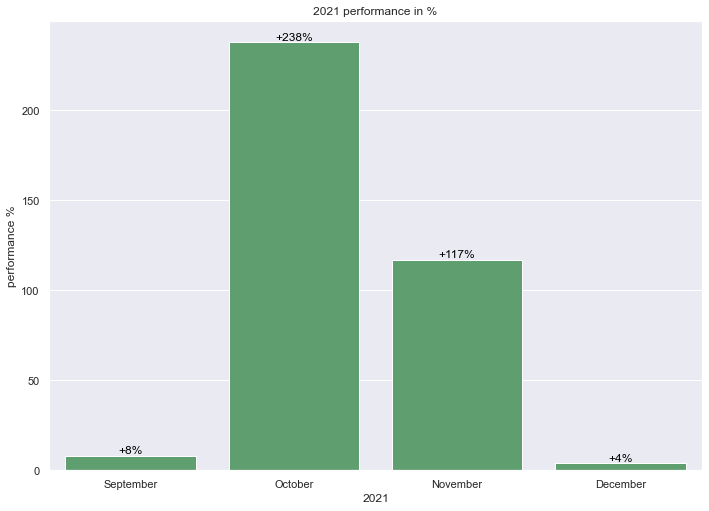

ValueError: Could not interpret input 'date'

In [14]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


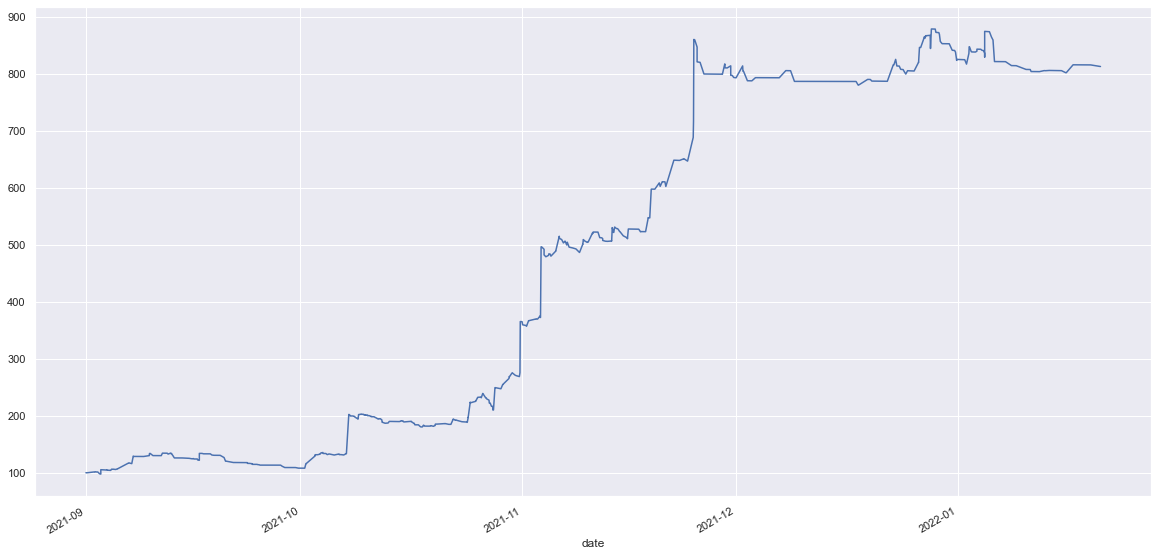

In [15]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021':])

In [16]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
586,2022-01-13 07:00:00,FTM/USD,Buy,Buy Market Order,2.98215,0.178511,536.754870,89.994613,805.132304
587,2022-01-13 20:00:00,FTM/USD,Sell,Sell Market Order,2.98915,0.178890,805.583377,0.000000,805.583377
588,2022-01-15 13:00:00,FTT/USD,Buy,Buy Market Order,45.65600,0.178571,536.936537,5.880241,805.404806
589,2022-01-15 13:00:00,CRV/USD,Buy,Buy Market Order,5.40305,0.178531,268.379003,49.671760,805.226274
590,2022-01-16 00:00:00,CRV/USD,Sell,Sell Market Order,5.35200,0.176786,534.045477,0.000000,802.513745
591,2022-01-16 03:00:00,FTT/USD,Sell,Sell Market Order,45.54900,0.178113,801.706447,0.000000,801.706447
592,2022-01-16 05:00:00,FTM/USD,Buy,Buy Market Order,2.99095,0.177712,534.352490,89.328222,801.528735
593,2022-01-17 04:00:00,FTM/USD,Sell,Sell Market Order,3.14915,0.187070,815.473390,0.000000,815.473390
594,2022-01-19 15:00:00,FTT/USD,Buy,Buy Market Order,46.10100,0.180763,543.528418,5.894974,815.292627
595,2022-01-21 00:00:00,FTT/USD,Sell,Sell Market Order,45.65300,0.178967,812.472711,0.000000,812.472711
